In [59]:
var openDigger = require('../src/open_digger');

In [60]:
var query = openDigger.driver.clickhouse.query;

In [61]:
var year = 2021, startYear = 2016;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); 

var months = Array.from({ length: 12 }, (_, i) => i + 1); 

var dates = [];
var dates_for_print = []
years.forEach(year =>{
    months.forEach(month =>{
        dates.push([year, month]);
        dates_for_print.push(year + '-' + month);
    });
});

In [62]:
// 获取第一次push的时间(年月)
var start_index = 0;
promise = Promise.all(dates.map(date => {
    var q = `SELECT COUNT(*) as count FROM github_log.year${date[0]} where repo_id = '73902337' and toMonth(created_date) = ${date[1]} and type = 'PushEvent'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    for (var i in data) {
        if (parseInt(data[i][0].count) > 0) {
            start_index = i;
            break;
        }
    }
});

In [63]:
var used_dates = dates.slice(start_index);
var used_dates_print = []
used_dates.forEach(date =>{
    used_dates_print.push(date[0] + '-' + date[1]);
});

## Fork/Star数量

In [6]:
var fork_num = []
Promise.all(used_dates.map(date => {
    var q = `SELECT COUNT() as fork_num FROM github_log.year${date[0]} where repo_id = '73902337' and toMonth(created_date) = ${date[1]} and type = 'ForkEvent'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        fork_num.push(parseInt(d[0].fork_num));
    });
});

In [7]:
var star_num = []
Promise.all(used_dates.map(date => {
    var q = `SELECT COUNT() as star_num FROM github_log.year${date[0]} where repo_id = '73902337' and toMonth(created_date) = ${date[1]} and type = 'WatchEvent'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        star_num.push(parseInt(d[0].star_num));
    });
});

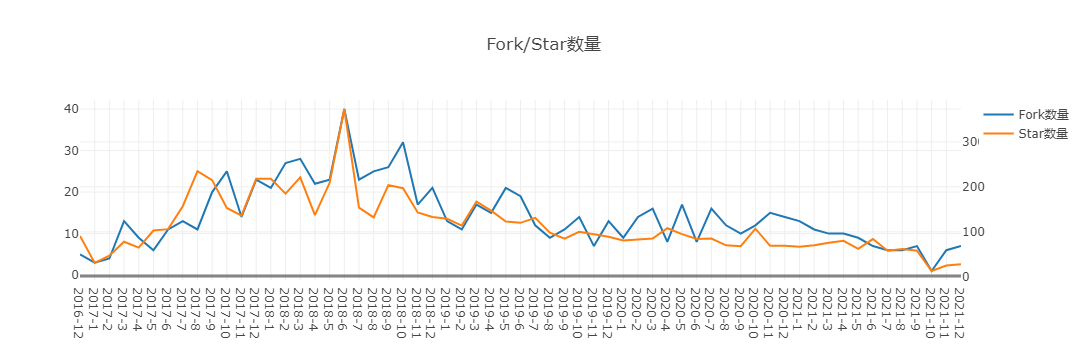

In [8]:
openDigger.render.plotly([
    {x: used_dates_print, y: fork_num, mode: 'scatter', name: 'Fork数量'},
    {x: used_dates_print, y: star_num, mode: 'scatter', name: 'Star数量', yaxis: 'y2'},
], {
    title: 'Fork/Star数量',
    yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
    xaxis: {type: 'category'}
});
    
var table_items = []
for (var i = 0; i < print_dates.length; ++i) {
    table_items.push({'日期': used_dates_print[i], 
                      'Fork数量': fork_num[i], 
                      'Star数量': star_num[i]});
}
console.table(table_items);

## Issue数量

In [9]:
var opened_count = []
Promise.all(dates.map(date => {
    var q = `SELECT COUNT(*) as opened_count FROM github_log.year${date[0]} where repo_id = '73902337' and toMonth(created_date) = ${date[1]} and type = 'IssuesEvent' and action = 'opened'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        opened_count.push(parseInt(d[0].opened_count));
    });
});

In [10]:
var closed_count = []
Promise.all(dates.map(date => {
    var q = `SELECT COUNT(*) as closed_count FROM github_log.year${date[0]} where repo_id = '73902337' and toMonth(created_date) = ${date[1]} and type = 'IssuesEvent' and action = 'closed'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        closed_count.push(parseInt(d[0].closed_count));
    });
});

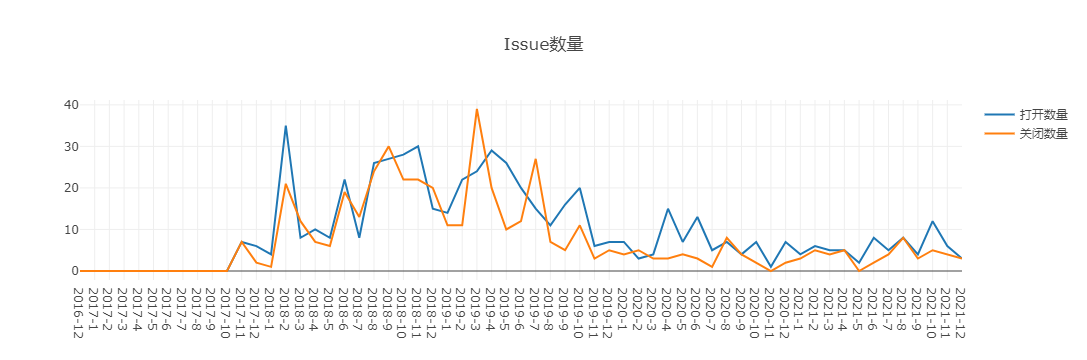

In [11]:
openDigger.render.plotly([
    {x: used_dates_print, y: opened_count, mode: 'scatter', name: '打开数量'},
    {x: used_dates_print, y: closed_count, mode: 'scatter', name: '关闭数量'},
], {
    title: 'Issue数量',
    yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
    xaxis: {type: 'category'}
});
    
var table_items = []
for (var i = 0; i < print_dates.length; ++i) {
    table_items.push({'日期': used_dates_print[i], 
                      '打开数量': opened_count[i], 
                      '关闭数量': closed_count[i]});
}
console.table(table_items);

PR数量

In [12]:
opened_pr = []
Promise.all(used_dates.map(date => {
    var q = `SELECT count(*) as count FROM github_log.year${date[0]} where repo_id = '73902337' and toMonth(created_date) = ${date[1]} and type = 'PullRequestEvent' and action = 'opened'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        opened_pr.push(parseInt(d[0].count));
    });
});

In [13]:
merged_pr = []
Promise.all(used_dates.map(date => {
    var q = `SELECT count(*) as count FROM github_log.year${date[0]} where repo_id = '73902337' and toMonth(created_date) = ${date[1]} and type = 'PullRequestEvent' and pull_merged = '1'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        merged_pr.push(parseInt(d[0].count));
    });
});

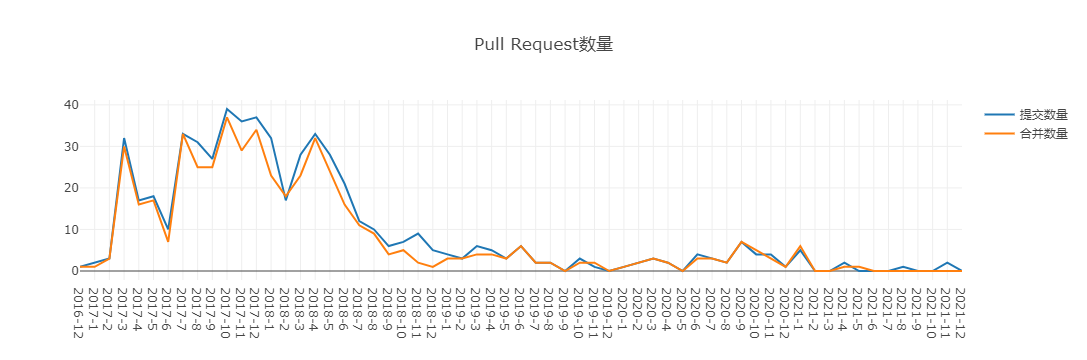

┌─────────┬───────────┬──────────┬──────────┐
│ (index) │   日期    │ 提交数量 │ 合并数量 │
├─────────┼───────────┼──────────┼──────────┤
│    0    │ '2016-12' │    1     │    1     │
│    1    │ '2017-1'  │    2     │    1     │
│    2    │ '2017-2'  │    3     │    3     │
│    3    │ '2017-3'  │    32    │    30    │
│    4    │ '2017-4'  │    17    │    16    │
│    5    │ '2017-5'  │    18    │    17    │
│    6    │ '2017-6'  │    10    │    7     │
│    7    │ '2017-7'  │    33    │    33    │
│    8    │ '2017-8'  │    31    │    25    │
│    9    │ '2017-9'  │    27    │    25    │
│   10    │ '2017-10' │    39    │    37    │
│   11    │ '2017-11' │    36    │    29    │
│   12    │ '2017-12' │    37    │    34    │
│   13    │ '2018-1'  │    32    │    23    │
│   14    │ '2018-2'  │    17    │    18    │
│   15    │ '2018-3'  │    28    │    23    │
│   16    │ '2018-4'  │    33    │    32    │
│   17    │ '2018-5'  │    28    │    24    │
│   18    │ '2018-6'  │    21    │    16    

In [14]:
openDigger.render.plotly([
    {x: used_dates_print, y: opened_pr, mode: 'scatter', name: '提交数量'},
    {x: used_dates_print, y: merged_pr, mode: 'scatter', name: '合并数量'},
], {
    title: 'Pull Request数量',
    yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
    xaxis: {type: 'category'}
});

var table_items = []
for (var i = 0; i < used_dates_print.length; ++i) {
    table_items.push({'日期': used_dates_print[i], 
                      '提交数量': opened_pr[i], 
                      '合并数量': merged_pr[i]});
}
console.table(table_items);

## 不同开发者总数量

In [18]:
github_num = []
Promise.all(used_dates.map(date => {
    var q = `SELECT COUNT( distinct(actor_login) ) as github_num, '${date[0]}' as year, '${date[1]}' as month FROM github_log.year${date[0]} where repo_id = '73902337' and toMonth(created_date) = ${date[1]}`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    data.forEach(d => {
        github_num.push(d[0].github_num);
    });
});

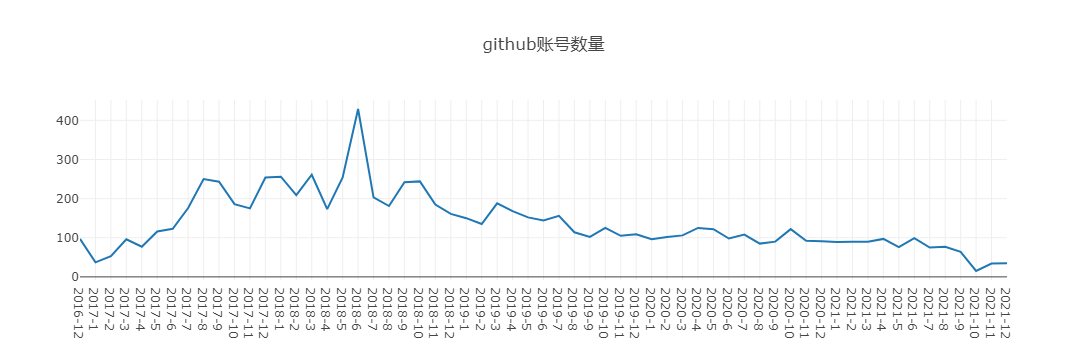

┌─────────┬───────────┬────────────────┐
│ (index) │   日期    │ github账号数量 │
├─────────┼───────────┼────────────────┤
│    0    │ '2016-12' │      '97'      │
│    1    │ '2017-1'  │      '37'      │
│    2    │ '2017-2'  │      '53'      │
│    3    │ '2017-3'  │      '96'      │
│    4    │ '2017-4'  │      '77'      │
│    5    │ '2017-5'  │     '116'      │
│    6    │ '2017-6'  │     '123'      │
│    7    │ '2017-7'  │     '176'      │
│    8    │ '2017-8'  │     '250'      │
│    9    │ '2017-9'  │     '243'      │
│   10    │ '2017-10' │     '186'      │
│   11    │ '2017-11' │     '175'      │
│   12    │ '2017-12' │     '254'      │
│   13    │ '2018-1'  │     '256'      │
│   14    │ '2018-2'  │     '209'      │
│   15    │ '2018-3'  │     '261'      │
│   16    │ '2018-4'  │     '173'      │
│   17    │ '2018-5'  │     '254'      │
│   18    │ '2018-6'  │     '429'      │
│   19    │ '2018-7'  │     '203'      │
│   20    │ '2018-8'  │     '181'      │
│   21    │ '2018-9'  

In [20]:
openDigger.render.plotly([
    {x: used_dates_print, y: github_num, mode: 'scatter', name: 'github账号数量'},
], {
    title: 'github账号数量',
    yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
    xaxis: {type: 'category'}
});

var table_items = []
for (var i = 0; i < used_dates_print.length; ++i) {
    table_items.push({'日期': used_dates_print[i], 
                      'github账号数量': github_num[i]});
}
console.table(table_items);

## Issue 从打开到关闭的平均时长和中位数

In [75]:
var year = 2021, startYear = 2016;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); 

var opened_date = {};
var merged_date = {};
years.forEach(year =>{
   query(`
SELECT created_at as date, action, issue_id FROM github_log.year${year}
WHERE type='IssuesEvent' and (action = 'opened' or (action = 'closed')) AND repo_id = '73902337' 
`).then(res=>{
       for (var d of res) {
           if (d.action == "opened") {
               opened_date[d.issue_id] = d.date;
           } else {
               merged_date[d.issue_id] = d.date;
           }
       } 
    })
});

In [76]:
var merge_times = [];
for (var issue_id in merged_date){
    start_time = opened_date[issue_id];
    end_time = merged_date[issue_id];
    if (issue_id in opened_date) {
        merge_times.push((Date.parse(end_time) - Date.parse(start_time))/86400000 + 1);
    } 
};

merge_times.sort();

var sum_times = 0;
for (var time of merge_times) {
    sum_times += time;
}
sum_times /= merge_times.length;
console.log("2016-2021:平均时间 =  ", sum_times);
console.log("2016-2021:中位数 =  ", merge_times[(merge_times.length+1)/2]);

2016-2021:平均时间 =   45.824891634623896
2016-2021:中位数 =   255.25736111111112


## PR 从打开到合入的平均时长和中位数（单位：天）

In [77]:
var year = 2021, startYear = 2016;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); 

var opened_date = {};
var merged_date = {};
years.forEach(year =>{
   query(`
SELECT created_date as date, action, issue_id FROM github_log.year${year}
WHERE type='PullRequestEvent' and (action = 'opened' or (action = 'closed' and pull_merged = '1')) AND repo_id = '73902337' 
`).then(res=>{
       for (var d of res) {
           if (d.action == "opened") {
               opened_date[d.issue_id] = d.date;
           } else {
               merged_date[d.issue_id] = d.date;
           }
       } 
    })
});

In [79]:
var merge_times = [];
for (var issue_id in merged_date){
    start_time = opened_date[issue_id];
    end_time = merged_date[issue_id];
    if (issue_id in opened_date) {
        merge_times.push((Date.parse(end_time) - Date.parse(start_time))/86400000 + 1);
    } 
};

merge_times.sort();

var sum_times = 0;
for (var time of merge_times) {
    sum_times += time;
}
sum_times /= merge_times.length;
console.log("2016-2021:平均时间 =  ", sum_times);
console.log("2016-2021:中位数 =  ", merge_times[merge_times.length/2]);

2016-2021:平均时间 =   5.091836734693878
2016-2021:中位数 =   2


## Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [82]:
years.forEach(function (year) {
    
    openDigger.driver.clickhouse.query(`
    SELECT repo_id, ceil(avg(issue_first_response_day)) AS issue_first_response_day_avg FROM
        (SELECT repo_id, issue_id, ceil(dateDiff('day', any(issue_created_at), min(created_at))) AS issue_first_response_day
        FROM github_log.year${year}
        WHERE type='IssueCommentEvent' AND action='created' AND toYear(issue_created_at)=${year} AND repo_id = '73902337'
        GROUP BY repo_id, issue_id
        HAVING issue_first_response_day > 0)
    GROUP BY repo_id
`).then(data => {
    console.info(year,"issue从打开到第一次回复平均数据：")
    console.info(data)
});
})


2021 issue从打开到第一次回复平均数据：
[ { repo_id: '73902337', issue_first_response_day_avg: 5 } ]
2020 issue从打开到第一次回复平均数据：
[ { repo_id: '73902337', issue_first_response_day_avg: 5 } ]
2018 issue从打开到第一次回复平均数据：
[ { repo_id: '73902337', issue_first_response_day_avg: 8 } ]
2017 issue从打开到第一次回复平均数据：
[ { repo_id: '73902337', issue_first_response_day_avg: 18 } ]
2016 issue从打开到第一次回复平均数据：
[ { repo_id: '73902337', issue_first_response_day_avg: 12 } ]
2019 issue从打开到第一次回复平均数据：
[ { repo_id: '73902337', issue_first_response_day_avg: 3 } ]


In [83]:
years.forEach(function (year) {
    openDigger.driver.clickhouse.query(`
    SELECT issue_first_response_day as day FROM
        (SELECT  issue_id, ceil(dateDiff('day', any(issue_created_at), min(created_at))) AS issue_first_response_day
        FROM github_log.year${year}
        WHERE type='IssueCommentEvent' AND action='created' AND toYear(issue_created_at)=${year} AND repo_id = '73902337'
        GROUP BY issue_id
        HAVING issue_first_response_day > 0)
    GROUP BY  issue_first_response_day
    ORDER BY issue_first_response_day ASC
`).then(data => {
    console.info(year,"issue从打开到第一次回复中位数数据：")
    var index = parseInt(data.length / 2)
    console.info(data[index])
});
})

2017 issue从打开到第一次回复中位数数据：
{ day: '52' }
2021 issue从打开到第一次回复中位数数据：
{ day: '4' }
2016 issue从打开到第一次回复中位数数据：
{ day: '11' }
2019 issue从打开到第一次回复中位数数据：
{ day: '5' }
2020 issue从打开到第一次回复中位数数据：
{ day: '9' }
2018 issue从打开到第一次回复中位数数据：
{ day: '19' }


In [85]:
var opened_date = {};
var review_date = {};
years.forEach(year =>{
   query(`
SELECT created_date as date, action, issue_id FROM github_log.year${year}
WHERE type='PullRequestEvent' and action = 'opened' AND repo_id = '73902337' 
`).then(res=>{
       for (var d of res) {
            opened_date[d.issue_id] = d.date;
       } 
    })
});
years.forEach(year =>{
   query(`
SELECT created_date as date, action, issue_id FROM github_log.year${year}
WHERE type='PullRequestReviewCommentEvent' and action = 'created' AND repo_id = '73902337' 
`).then(res=>{
       for (var d of res) {
            review_date[d.issue_id] = d.date;
           // console.log(review_date[d.issue_id]);
       } 
    })
});

In [88]:
var merge_times = [];
for (var issue_id in merged_date){
    start_time = opened_date[issue_id];
    end_time = review_date[issue_id];
    if (issue_id in opened_date) {
        var time = (Date.parse(end_time) - Date.parse(start_time))/86400000 + 1;
        if(!isNaN(time)){
            merge_times.push(time);
        }
        
    } 
};

merge_times.sort();

var sum_times = 0;
for (var time of merge_times) {
    // console.log(time);
    if(!isNaN(time)){
        sum_times += time;
    }
    
}
sum_times /= merge_times.length;
console.log("2016-2021:PR从打开到第一次回复平均时间 =  ", sum_times);
console.log("2016-2021:PR从打开到第一次回复中位数 =  ", merge_times[merge_times.length/2]);

2016-2021:PR从打开到第一次回复平均时间 =   5.959016393442623
2016-2021:PR从打开到第一次回复中位数 =   2
